In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import the requests library
import requests

# import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# starting url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alta floresta
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | zalantun
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | oregon city
Processing Record 7 of Set 1 | coahuayana
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | alexandria
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | byron bay
Processing Record 19 of Set 1 | jaisalmer
Processing Record 20 of Set 1 | balkanabat
Processing Record 21 of Set 1 |

Processing Record 37 of Set 4 | thrissur
Processing Record 38 of Set 4 | dhidhdhoo
Processing Record 39 of Set 4 | tuy hoa
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | sinnamary
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | san quintin
Processing Record 44 of Set 4 | eureka
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | saraland
Processing Record 47 of Set 4 | agadez
Processing Record 48 of Set 4 | ust-kut
Processing Record 49 of Set 4 | kalmunai
Processing Record 50 of Set 4 | antalaha
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | laurel
Processing Record 4 of Set 5 | mandalgovi
Processing Record 5 of Set 5 | vestmannaeyjar
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | tessalit
Processing Record 8 of Set 5 | norman wells
Processing Record 9 of Set 5 | titisee-neustadt
Processing Record 10 of Set 5 |

Processing Record 25 of Set 8 | tura
Processing Record 26 of Set 8 | alghero
Processing Record 27 of Set 8 | nim ka thana
City not found. Skipping...
Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | barabai
Processing Record 30 of Set 8 | goderich
Processing Record 31 of Set 8 | zhigansk
Processing Record 32 of Set 8 | sangar
Processing Record 33 of Set 8 | trelew
Processing Record 34 of Set 8 | esil
Processing Record 35 of Set 8 | mackay
Processing Record 36 of Set 8 | hovd
Processing Record 37 of Set 8 | nemuro
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | morro bay
Processing Record 40 of Set 8 | wanning
Processing Record 41 of Set 8 | ampanihy
Processing Record 42 of Set 8 | namatanai
Processing Record 43 of Set 8 | sabha
Processing Record 44 of Set 8 | milkovo
Processing Record 45 of Set 8 | iralaya
Processing Record 46 of Set 8 | whitehorse
Processing Record 47 of Set 8 | sao gabriel da cachoeira
Processing Record 48 of Set 8 |

Processing Record 14 of Set 12 | hlobyne
Processing Record 15 of Set 12 | dvinskoy
Processing Record 16 of Set 12 | teofilo otoni
Processing Record 17 of Set 12 | labuhan
Processing Record 18 of Set 12 | ponnani
Processing Record 19 of Set 12 | port lincoln
Processing Record 20 of Set 12 | galveston
Processing Record 21 of Set 12 | santa rosalia
Processing Record 22 of Set 12 | troitskoye
Processing Record 23 of Set 12 | bilma
Processing Record 24 of Set 12 | komsomolskiy
Processing Record 25 of Set 12 | suhut
Processing Record 26 of Set 12 | gniezno
Processing Record 27 of Set 12 | maghama
City not found. Skipping...
Processing Record 28 of Set 12 | ormara
Processing Record 29 of Set 12 | ahuimanu
Processing Record 30 of Set 12 | iztapa
Processing Record 31 of Set 12 | vardo
Processing Record 32 of Set 12 | hirara
Processing Record 33 of Set 12 | batagay
Processing Record 34 of Set 12 | san cristobal
Processing Record 35 of Set 12 | staraya poltavka
Processing Record 36 of Set 12 | st

In [8]:
len(city_data)

571

In [9]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alta Floresta,-9.8756,-56.0861,72.36,45,27,3.65,BR,2022-07-24 03:24:04
1,Bredasdorp,-34.5322,20.0403,47.07,82,37,0.92,ZA,2022-07-24 03:24:05
2,Zalantun,48.0000,122.7167,74.03,76,98,8.19,CN,2022-07-24 03:24:05
3,Butaritari,3.0707,172.7902,81.48,79,96,15.70,KI,2022-07-24 03:24:05
4,Cidreira,-30.1811,-50.2056,61.68,98,100,8.12,BR,2022-07-24 03:24:05
5,Oregon City,45.3573,-122.6068,72.46,54,0,3.24,US,2022-07-24 03:24:06
6,Coahuayana,18.7333,-103.6833,77.77,86,40,1.41,MX,2022-07-24 03:24:06
7,Vaini,-21.2000,-175.2000,73.56,78,40,10.36,TO,2022-07-24 03:24:06
8,Poum,-20.2333,164.0167,74.55,72,97,10.00,NC,2022-07-24 03:21:20
9,Kapaa,22.0752,-159.3190,84.18,73,20,14.97,US,2022-07-24 03:24:07


In [10]:
# reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alta Floresta,BR,2022-07-24 03:24:04,-9.8756,-56.0861,72.36,45,27,3.65
1,Bredasdorp,ZA,2022-07-24 03:24:05,-34.5322,20.0403,47.07,82,37,0.92
2,Zalantun,CN,2022-07-24 03:24:05,48.0000,122.7167,74.03,76,98,8.19
3,Butaritari,KI,2022-07-24 03:24:05,3.0707,172.7902,81.48,79,96,15.70
4,Cidreira,BR,2022-07-24 03:24:05,-30.1811,-50.2056,61.68,98,100,8.12
...,...,...,...,...,...,...,...,...,...
566,Pokhara,NP,2022-07-24 03:26:53,28.2333,83.9833,75.25,86,100,3.00
567,Dolinsk,RU,2022-07-24 03:26:53,47.3500,142.8000,57.38,99,100,9.40
568,Aitape,PG,2022-07-24 03:26:53,-3.1374,142.3475,85.17,71,22,6.26
569,Aktash,RU,2022-07-24 03:26:54,50.3000,87.7333,53.10,53,63,4.52


In [12]:
# create the output (csv)
output_data_file = 'weather_data/cities.csv'
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/24/22'

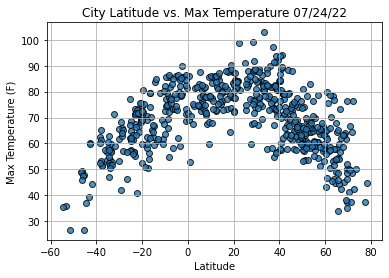

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

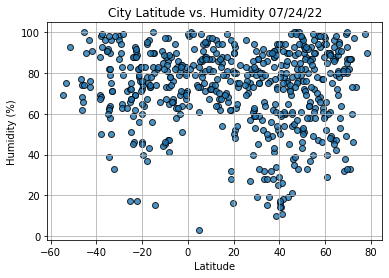

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

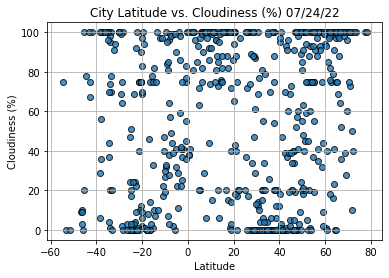

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

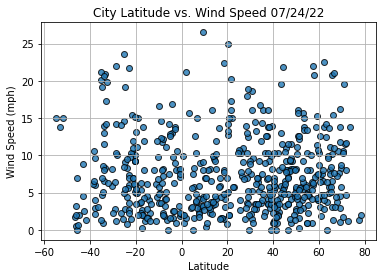

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Zalantun,CN,2022-07-24 03:24:05,48.0000,122.7167,74.03,76,98,8.19
3,Butaritari,KI,2022-07-24 03:24:05,3.0707,172.7902,81.48,79,96,15.70
5,Oregon City,US,2022-07-24 03:24:06,45.3573,-122.6068,72.46,54,0,3.24
6,Coahuayana,MX,2022-07-24 03:24:06,18.7333,-103.6833,77.77,86,40,1.41
9,Kapaa,US,2022-07-24 03:24:07,22.0752,-159.3190,84.18,73,20,14.97
...,...,...,...,...,...,...,...,...,...
564,Miles City,US,2022-07-24 03:26:52,46.4083,-105.8406,76.17,35,0,11.50
565,Aksarka,RU,2022-07-24 03:26:52,66.5606,67.7975,56.71,58,100,7.65
566,Pokhara,NP,2022-07-24 03:26:53,28.2333,83.9833,75.25,86,100,3.00
567,Dolinsk,RU,2022-07-24 03:26:53,47.3500,142.8000,57.38,99,100,9.40


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Zalantun,CN,2022-07-24 03:24:05,48.0000,122.7167,74.03,76,98,8.19
3,Butaritari,KI,2022-07-24 03:24:05,3.0707,172.7902,81.48,79,96,15.70
5,Oregon City,US,2022-07-24 03:24:06,45.3573,-122.6068,72.46,54,0,3.24
6,Coahuayana,MX,2022-07-24 03:24:06,18.7333,-103.6833,77.77,86,40,1.41
9,Kapaa,US,2022-07-24 03:24:07,22.0752,-159.3190,84.18,73,20,14.97


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

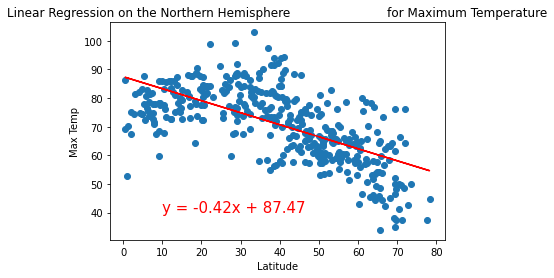

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

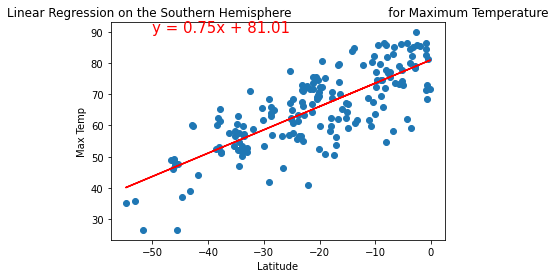

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

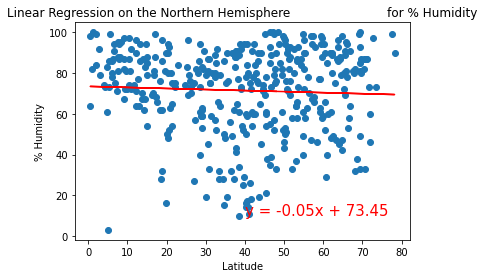

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

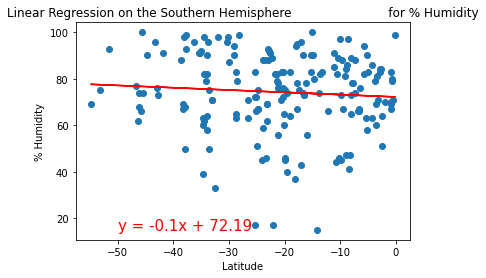

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

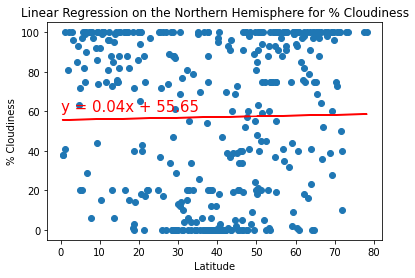

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(0,60))

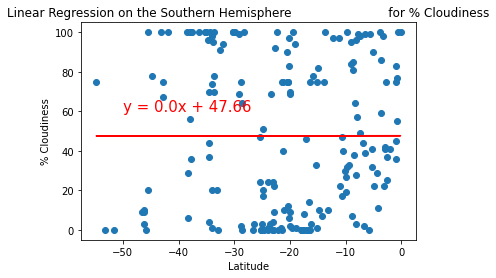

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

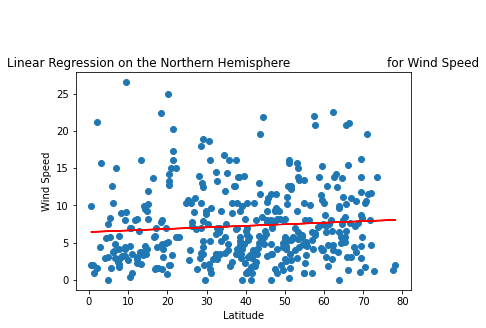

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

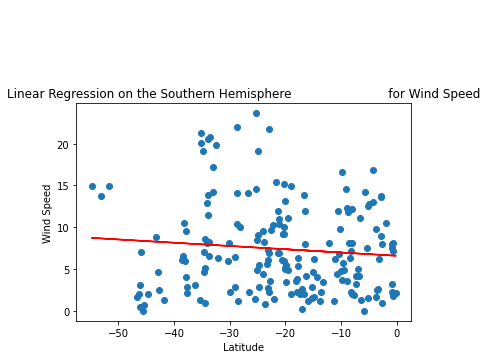

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))